## 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## 2. Load Files

In [2]:
# Helper function to inspect data at each step
def inspect_step(df, step_name):
    """Helper function to inspect data at each step"""
    print(f"\n{'='*20} {step_name} {'='*20}")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    print("\nDescriptive Statistics:")
    print(df.describe().round(2))

def load_and_inspect_data(filepath ='energy_efficiency_data.csv'):
    """Load and perform initial data inspection"""
    print("\n[Step 1: Loading Data]")

    dtypes = {
        'Relative_Compactness': float,
        'Surface_Area': float,
        'Wall_Area': float,
        'Roof_Area': float,
        'Overall_Height': float,
        'Orientation': float,
        'Glazing_Area': float,
        'Glazing_Area_Distribution': float,
        'Heating_Load': float,
        'Cooling_Load': float
    }
    
    try:
        df = pd.read_csv(filepath, dtype=dtypes)
    except Exception as e:
        print(f"Error loading file: {e}")
        df = pd.read_csv(filepath)
        for column in df.columns:
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    print("\nChecking for missing values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.any() else "No missing values found")
    
    print("\nChecking data types:")
    print(df.dtypes)
    
    # Inspect the loaded data
    inspect_step(df, "Initial Data Loading")
    return df

## 3. Analyze Features

In [3]:
def analyze_features(df):
    """Analyze feature correlations and distributions"""
    print("\n[Step 2: Feature Analysis]")

    # Correlation analysis
    print("\nGenerating correlation matrix...")
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr().round(3)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Inspect data after correlation analysis
    inspect_step(df, "Feature Analysis")
    return df

## 4. Preprocess Data

In [4]:
def prepare_data(df):
    """Prepare features and targets for modeling"""
    print("\n[Step 3: Data Preparation]")

    # Separate features and targets
    X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
    y_heating = df['Heating_Load']
    y_cooling = df['Cooling_Load']

    # Split train/test
    X_train, X_test, y_heat_train, y_heat_test, y_cool_train, y_cool_test = train_test_split(
        X, y_heating, y_cooling, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Training set shape:", X_train_scaled.shape)
    print("Test set shape:", X_test_scaled.shape)
    
    # Inspect data after scaling
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
    inspect_step(X_train_scaled_df, "Scaled Training Data")

    return X_train_scaled, X_test_scaled, y_heat_train, y_heat_test, y_cool_train, y_cool_test, scaler


## 5. Train and Evaluate Models

In [5]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, target_name):
    """Train and evaluate models"""
    print(f"\n[Step 4: Model Training and Evaluation for {target_name}]")

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)

    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Results comparison
    print(f"\nResults for {target_name}:")
    print("\nLinear Regression:")
    print(f"R² Score: {r2_score(y_test, lr_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.4f}")

    print("\nRandom Forest:")
    print(f"R² Score: {r2_score(y_test, rf_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")

    return lr_model, rf_model


## 6. Display the Data


[Step 1: Loading Data]

Checking for missing values:
No missing values found

Checking data types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                  float64
Glazing_Area                 float64
Glazing_Area_Distribution    float64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

==================== Initial Data Loading ====================
Shape: (768, 10)

First few rows:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90

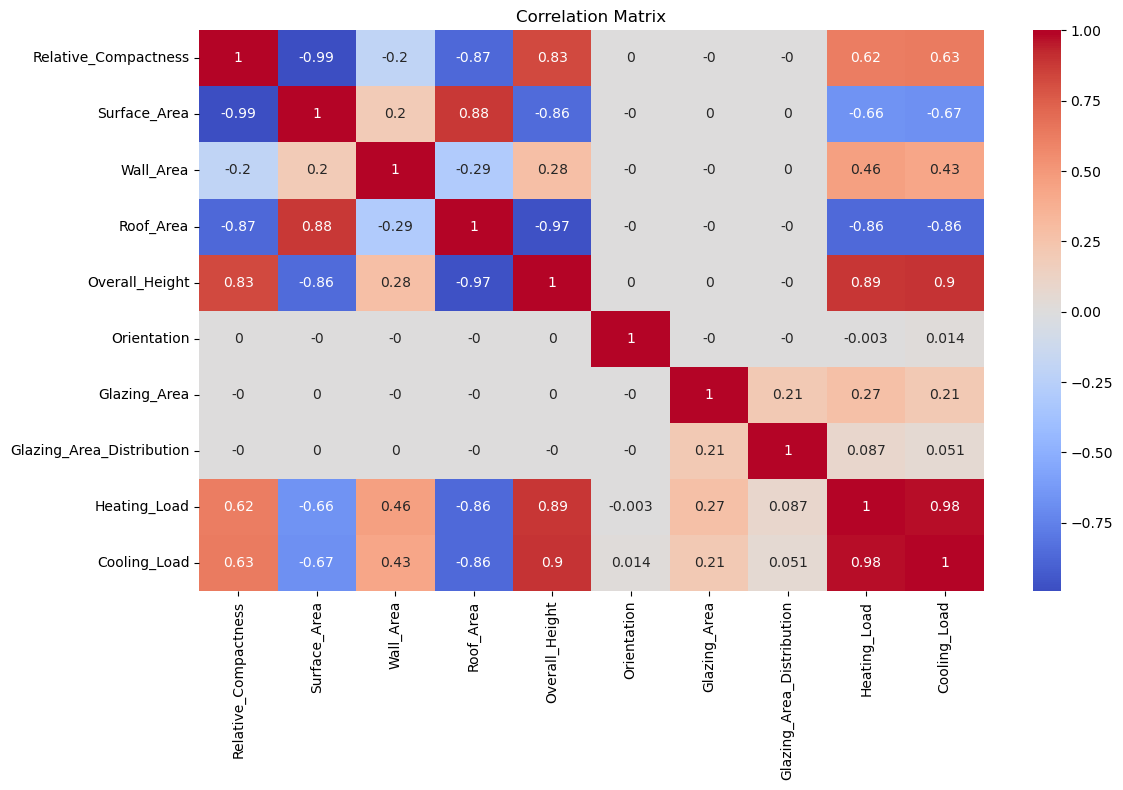


==================== Feature Analysis ====================
Shape: (768, 10)

First few rows:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0          2.0           0.0                        0.0         15.55   
1          3.0           0.0                        0.0         15.55   
2          4.0           0.0                        0.0         15.55   
3          5.0           0.0                        0.0         15.55   
4          2.0           0.0                        0.0         20

In [7]:
def main():
    # Step 1: Load and inspect data
    df = load_and_inspect_data('energy_efficiency_data.csv')

    # Step 2: Analyze features
    df = analyze_features(df)

    # Step 3: Prepare data
    (X_train_scaled, X_test_scaled, y_heat_train, y_heat_test,
     y_cool_train, y_cool_test, scaler) = prepare_data(df)

    # Step 4: Train and evaluate models
    # Heating Load
    lr_heat, rf_heat = train_and_evaluate_models(
        X_train_scaled, X_test_scaled, y_heat_train, y_heat_test, "Heating Load"
    )
    
    # Cooling Load
    lr_cool, rf_cool = train_and_evaluate_models(
        X_train_scaled, X_test_scaled, y_cool_train, y_cool_test, "Cooling Load"
    )

if __name__ == "__main__":
    main()